<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Logistic Regression
 
_Authors: Multiple_
 
---

<a id="learning-objectives"></a>
### Learning Objectives

- Use logistic regression with categorical features.
- Utilize different metrics for evaluating classifier models.


### Plan of Attack
- [Predicting a Categorical Response](#predicting-a-categorical-response)
- [Using Logistic Regression for Classification](#using-logistic-regression-for-classification)

# Introduction

In this lesson we learn about Logistic Regression or what is sometimes reffered to as Logistic Classification.

"How can a model be both a Regression and a Classification?" you may ask.  

---

<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the data set. What are the counts in each category?**

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [122]:
glass = pd.read_csv('./datasets/glass.csv')

In [123]:
# Take a look at the data
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [124]:
# Make the column names more uniform
glass.columns = [i.lower() for i in glass.columns]

In [125]:
glass.columns

Index(['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'type'], dtype='object')

In [126]:
# Examine glass_type.
glass['type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new column, called `household`,  that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [127]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
glass['household'] = glass.type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

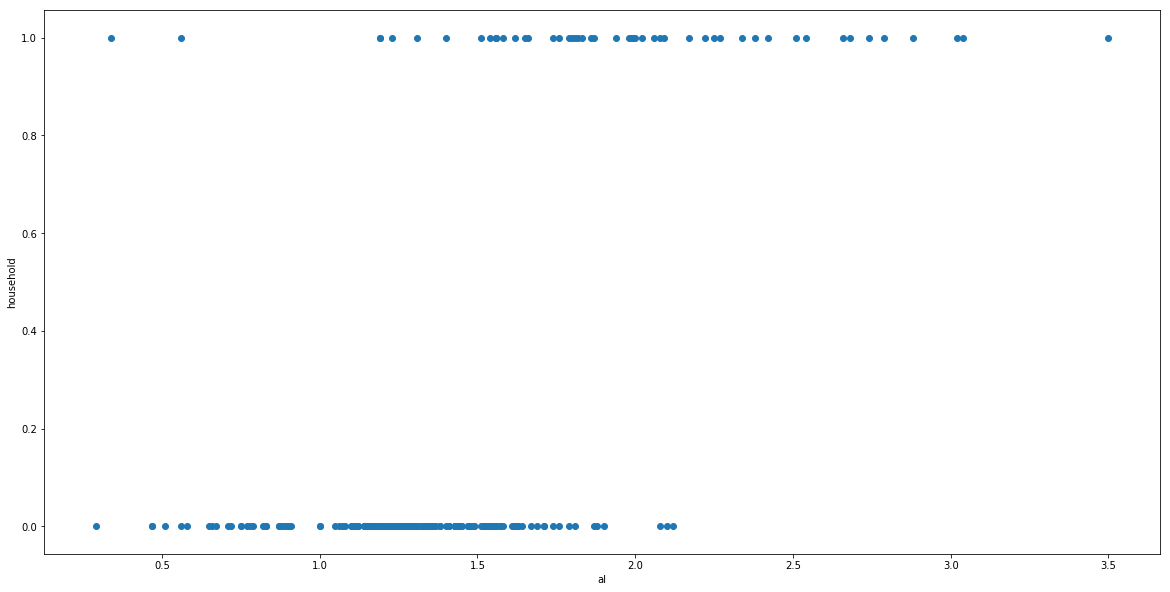

In [128]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household');

<a id="using-logistic-regression-for-classification"></a>
## Using Logistic Regression for Classification
---

Logistic regression is a form of regression that ensures the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

In [129]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
X = glass[['al']]
y = glass.household

In [130]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**
What do you see?

Text(0,0.5,'household')

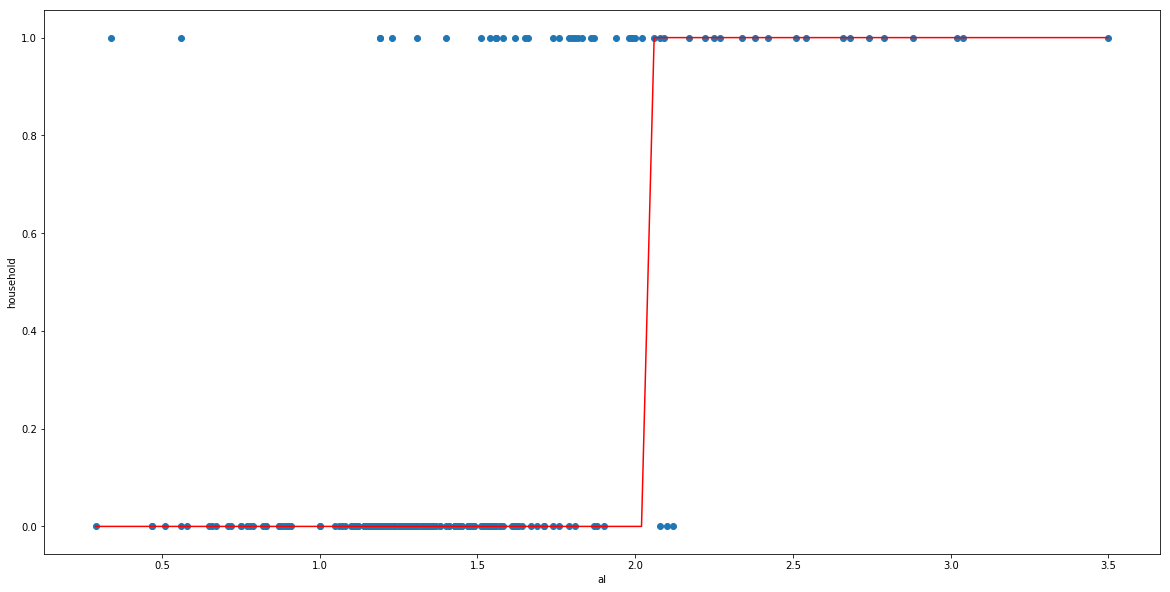

In [101]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [102]:
logreg.predict_proba(X)[0:10]

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ],
       [0.95265323, 0.04734677],
       [0.95265323, 0.04734677],
       [0.95080573, 0.04919427],
       [0.94378757, 0.05621243],
       [0.94271112, 0.05728888]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [103]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [104]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0.028066
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,0.030943
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0.039820
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0.039820
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0.043012


**Plot the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

Text(0,0.5,'household')

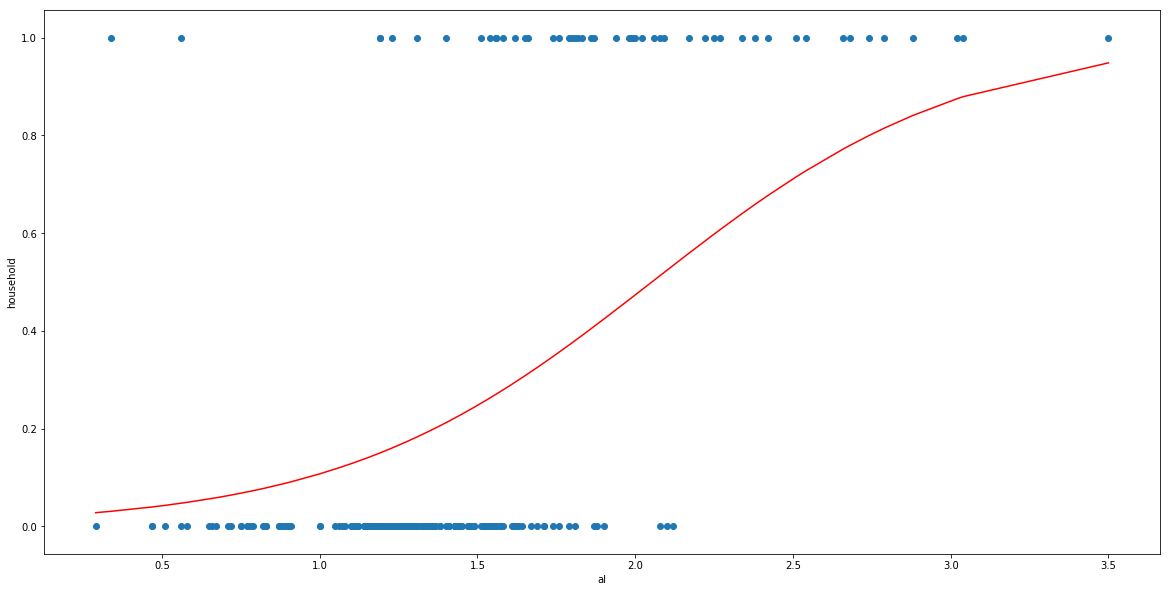

In [105]:
# Plot the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

### Multiclass

- Build and train a one-versus-rest classifier
- Re-set the glass data
- y will remain the same `glass.household`
- Evaluate the model with `model.score` on the testing data.

In [131]:
# load data again
glass_m = pd.read_csv('./datasets/glass.csv')

In [132]:
# check data head
glass_m.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [133]:
# our majority classes => baseline accurecy
glass_m.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Text(0,0.5,'type')

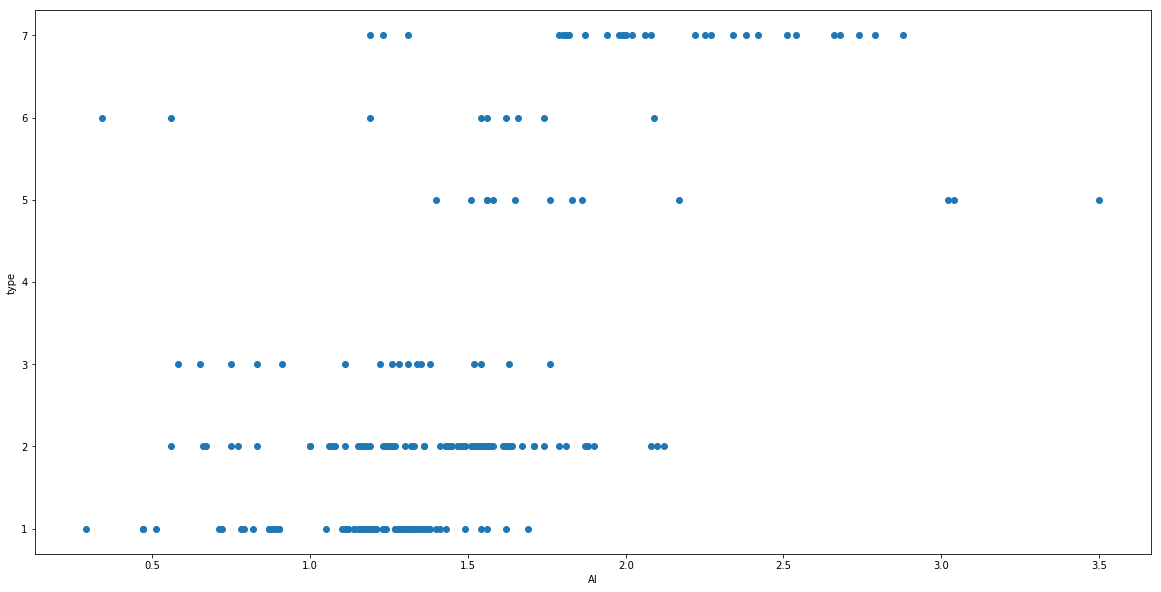

In [134]:
# plot Al , target
plt.scatter(glass_m.Al, glass_m.Type)
plt.xlabel('Al')
plt.ylabel('type')

In [138]:
# X, y
glass_m.sort_values(by='Al', inplace=True)
X = glass_m[['Al']]
y = glass_m.Type

In [140]:
# fit a model (ovr)
ovr = LogisticRegression(multi_class='ovr')
ovr.fit(X, y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
# fit a model (multinomial)
sm = LogisticRegression(multi_class='multinomial' , solver='lbfgs')
sm.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
# make prediction from ovr and save it on the dataset
glass_m['ovr_preds'] = ovr.predict(X)

In [145]:
# make prediction from multinomial and save it on the dataset
glass_m['sm_preds'] = sm.predict(X)

In [146]:
glass_m.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ovr_preds,sm_preds
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1,1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1,1


In [147]:
# check ovr model score 
ovr.score(X,y)

0.49065420560747663

In [148]:
# check multinomial model score 
sm.score(X,y)

0.4953271028037383

Text(0,0.5,'type')

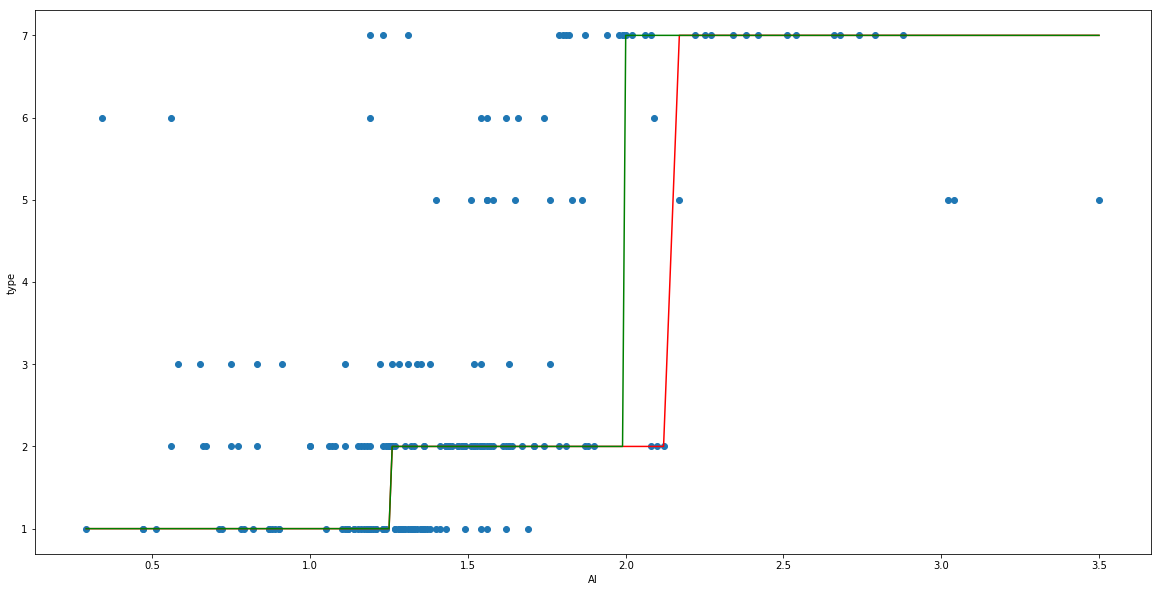

In [155]:
# Plot the class predictions from ovr
plt.scatter(glass_m.Al, glass_m.Type)
plt.plot(glass_m.Al, glass_m.ovr_preds, color='r')
plt.plot(glass_m.Al, glass_m.sm_preds, color='g')
plt.xlabel('Al')
plt.ylabel('type')

In [154]:
glass_m.ovr_preds.value_counts()

2    125
1     72
7     17
Name: ovr_preds, dtype: int64

In [156]:
# apply regularization
model = LogisticRegressionCV()
model.fit(X,y)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [157]:
model.score(X,y)

0.4953271028037383

In [158]:
# check paramters
model.C_

array([4.64158883e-02, 1.00000000e-04, 1.00000000e-04, 2.78255940e+00,
       1.00000000e-04, 3.59381366e-01])

In [159]:
model.Cs

10

In [160]:
model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])